In [4]:
pip install textblob

  Using cached textblob-0.17.1-py2.py3-none-any.whl (636 kB)
  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Using cached regex-2022.10.31-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (772 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install cleantext

  Using cached cleantext-1.1.4-py3-none-any.whl (4.9 kB)
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install discopy

  Using cached discopy-0.4.3-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install spacy

  Using cached spacy-3.4.3-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (6.6 MB)
  Using cached cymem-2.0.7-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (36 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached preshed-3.0.8-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (130 kB)
  Using cached murmurhash-1.0.9-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (21 kB)
  Using cached thinc-8.1.5-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (819 kB)
  Using cached spacy_legacy-3.0.10-py2.py3-none-any.whl (21 kB)
  Using cached catalogue-2.0.8-py3-none-any.whl (17 kB)
  Using cached spacy_loggers-1.0.3-py3-none-any.whl (9.3 kB)
  Using cached wasabi-0.10.1-py3-none-any.whl (26 kB)
  Using cached pydantic-1.10.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.6 MB)
  Using cached srsly-2.4.5-cp38-cp38-manylinux_2_17_x86_64.man

In [8]:
pip install lambeq

  Using cached lambeq-0.2.7-py3-none-any.whl (129 kB)
  Using cached pytket-1.8.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.3 MB)
  Using cached transformers-4.24.0-py3-none-any.whl (5.5 MB)
  Using cached tensornetwork-0.4.6-py3-none-any.whl (364 kB)
  Using cached qwasm-1.0.1-py3-none-any.whl (15 kB)
  Using cached types_pkg_resources-0.1.3-py2.py3-none-any.whl (4.8 kB)
  Using cached lark_parser-0.12.0-py2.py3-none-any.whl (103 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached tokenizers-0.13.2-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.6 MB)
  Using cached filelock-3.8.0-py3-none-any.whl (10 kB)
  Using cached huggingface_hub-0.11.0-py3-none-any.whl (182 kB)
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install pytket-qiskit

  Using cached pytket_qiskit-0.30.0-py3-none-any.whl (42 kB)
Note: you may need to restart the kernel to use updated packages.


In [10]:
import sys
!{sys.executable} -m spacy download en

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 12.8 MB 23.7 MB/s eta 0:00:01  |█████████████▋                  | 5.4 MB 23.7 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [18]:
import collections
import pickle
import sys
import warnings
import os
from random import shuffle

from textblob import TextBlob
from cleantext import clean

from discopy.tensor import Tensor
from discopy import Word
from discopy.rigid import Functor
import spacy

import matplotlib.pyplot as plt
import numpy as np
from numpy import random, unique
import lambeq
from lambeq import AtomicType, IQPAnsatz, remove_cups, NumpyModel, spiders_reader, cups_reader, stairs_reader, Rewriter
from lambeq import BobcatParser
from lambeq import Dataset
from lambeq import TreeReader, TreeReaderMode
from lambeq import QuantumTrainer, SPSAOptimizer
from lambeq import TketModel
from lambeq import SpacyTokeniser
from pytket.circuit.display import render_circuit_jupyter
from pytket.extensions.qiskit import AerBackend

print("All packages imported successfully!")

All packages imported successfully!


In [19]:
warnings.filterwarnings("ignore")
os.environ["TOKENIZERS_PARALLELISM"] = "false"
spacy.load('en_core_web_sm')

In [20]:
BATCH_SIZE = 30
EPOCHS = 300
EPSILON = sys.float_info.epsilon
SEED = 0

In [21]:
# Function for replacing low occuring word(s) with <unk> token
def replace(box):
    if isinstance(box, Word) and dataset.count(box.name) < 2:
        return Word('unk', box.cod, box.dom)
    return box


# Function for removing punctuations at sentence level
def remove_dots_commas(sentence):
    sentence = sentence.replace(",", "")
    sentence = sentence.replace(" .", "")
    return sentence


# Function for removing punctuations at sentence level for a list of sentences
def remove_dots_commas_sentences(list):
    for i in range(len(list)):
        list[i] = remove_dots_commas(list[i])
    return list


# Function for removing determiners at sentence level
def remove_determiner(sentence):
    sentence = sentence.replace("the ", "")
    sentence = sentence.replace("The ", "")
    return sentence


# Function for removing determiners at sentence level for a list of sentences
def remove_determiner_sentences(list):
    for i in range(len(list)):
        list[i] = remove_determiner(list[i])
    return list


# Function for removing auxiliary at sentence level
def remove_auxiliary(sentence):
    sentence = sentence.replace("I am", "I")
    sentence = sentence.replace("I 'm", "I")
    sentence = sentence.replace("I was", "I")
    sentence = sentence.replace("I were", "I")
    sentence = sentence.replace("you are", "you")
    sentence = sentence.replace("you were", "you")
    sentence = sentence.replace("you 're", "you")
    sentence = sentence.replace("he is", "he")
    sentence = sentence.replace("he was", "he")
    sentence = sentence.replace("he 's", "he")
    sentence = sentence.replace("she is", "she")
    sentence = sentence.replace("she was", "she")
    sentence = sentence.replace("she 's", "he")
    sentence = sentence.replace("they are", "they")
    sentence = sentence.replace("they 're", "they")
    sentence = sentence.replace("they were", "they")
    return sentence


# Fix suffix token at sentence level (you can use this function together with spacy tokenization)
def fix_suffix(sentence, spacy_token=False):
    if spacy_token is False:
        sentence = sentence.replace("'m", " am")
        sentence = sentence.replace("'s", " is")
        sentence = sentence.replace("'re", " are")
    else:
        sentence = sentence.replace("'m", "am")
        sentence = sentence.replace("'s", "is")
        sentence = sentence.replace("'re", "are")
    return sentence


# Fix suffix token at sentence level for a list of sentences
def fix_suffix_sentences(list, spacy_token):
    for i in range(len(list)):
        list[i] = fix_suffix(list[i], spacy_token)
    return list


# Function for removing auxiliary at sentence level for a list of sentences
def remove_auxiliary_sentences(list):
    for i in range(len(list)):
        list[i] = remove_auxiliary(list[i])
    return list


# Function for removing that connector at sentence level
def remove_connector(sentence):
    sentence = sentence.replace(" that", "")
    return sentence


# Function for removing that connector at sentence level for a list of sentences
def remove_connector_sentences(list):
    for i in range(len(list)):
        list[i] = remove_connector(list[i])
    return list


# Function for correcting dictation
def correct_dictation(sentence):
    sentence = TextBlob(sentence)
    result = sentence.correct()
    return result


# Function for correcting dication for a list of sentences
def correct_dication_sentences(list):
    for i in range(len(list)):
        list[i] = correct_dictation(list[i])
    return list


# Function for removing emojis
def remove_emoji(sentence):
    # removing emojis
    result = clean(sentence, no_emoji=True)
    # returning cleaned sentence
    return result


# Function for removing emojis for a list of sentences
def remove_emoji_sentences(list):
    for i in range(len(list)):
        list[i] = remove_emoji(list[i])
    return list


# reading dataset from a .txt file
def read_data(filename):
    labels, sentences = [], []
    with open(filename) as f:
        for line in f:
            t = int(line[0])
            labels.append([t, 1 - t])
            sentences.append(line[1:].strip())
    return labels, sentences


# Function for SpaCy Tokenization
def suffix_tokenizer(list):
    # tokenizing each sentence in the list
    list = tokeniser.tokenise_sentences(list)
    # merging the tokenized words back into a sentence
    for i in range(len(list)):
        list[i] = ' '.join(list[i])
    # returning tokenized list
    return list

In [22]:
# train/test split

# training dataset
train_labels, train_data = read_data('bc_train_data.txt')
# validation dataset
dev_labels, dev_data = read_data('bc_dev_data.txt')
# test dataset
test_labels, test_data = read_data('bc_test_data.txt')

labels = train_labels + dev_labels + test_labels
data = train_data + dev_data + test_data

pairs = list(zip(labels, data))
random.seed(0)
random.shuffle(pairs)
print(len(pairs))

N_EXAMPLES = len(pairs)

323


In [23]:
# Shuffling datasets
train_labels, train_data = zip(*pairs[:round(N_EXAMPLES * 0.4)])
dev_labels, dev_data = zip(*pairs[round(N_EXAMPLES * 0.4):round(N_EXAMPLES * 0.8)])
test_labels, test_data = zip(*pairs[round(N_EXAMPLES * 0.8):])

# training set words (with repetition)
train_data_string = ' '.join(train_data)
train_data_list = train_data_string.split(' ')
# validation set words (with repetition)
dev_data_string = ' '.join(dev_data)
dev_data_list = dev_data_string.split(' ')
# test set words (with repetition)
test_data_string = ' '.join(test_data)
test_data_list = test_data_string.split(' ')

In [24]:
# initializing spacy tokenizer
tokeniser = lambeq.SpacyTokeniser()

In [25]:
"""
tokenize for words with suffix (We can use either the SpaCy tokenizer or the fix_suffix method)
Note : using both suffix_tokenizer and fix_suffix_sentences essentially allows the model to perform better
"""
# suffix tokenizing for training dataset
train_data = suffix_tokenizer(train_data)
train_data = fix_suffix_sentences(train_data, spacy_token=True)
# suffix tokenizing for validation dataset
dev_data = suffix_tokenizer(dev_data)
dev_data = fix_suffix_sentences(dev_data, spacy_token=True)
# suffix tokenizing for testing dataset
test_data = suffix_tokenizer(test_data)
test_data = fix_suffix_sentences(test_data, spacy_token=True)

In [26]:
for i in range(len(train_data)):
    # rewriting training sentences for parser on sentence level (Use when not using Rewriter Object)
    # (Can use remove_dots_commas in either case)
    train_data[i] = remove_dots_commas(train_data[i])
    train_data[i] = remove_connector(train_data[i])
    train_data[i] = remove_auxiliary(train_data[i])
    train_data[i] = remove_determiner(train_data[i])

In [27]:
for i in range(len(dev_data)):
    # rewriting validation sentences for parser on sentence level (Use when not using Rewriter Object)
    # (Can use remove_dots_commas in either case)
    dev_data[i] = remove_dots_commas(dev_data[i])
    dev_data[i] = remove_connector(dev_data[i])
    dev_data[i] = remove_auxiliary(dev_data[i])
    dev_data[i] = remove_determiner(dev_data[i])

In [28]:
for i in range(len(test_data)):
    # rewriting testing sentences for parser on sentence level (Use when not using Rewriter Object)
    # (Can use remove_dots_commas in either case)
    test_data[i] = remove_dots_commas(test_data[i])
    test_data[i] = remove_connector(test_data[i])
    test_data[i] = remove_auxiliary(test_data[i])
    test_data[i] = remove_determiner(test_data[i])

In [29]:
# dataset words (with repetition)
dataset = train_data_list + dev_data_list + test_data_list
# list of all unique words in the dataset
unique_words = unique(dataset)
# frequency for each unique word
counter = collections.Counter(dataset)
print(counter)

Counter({'.': 323, 'I': 83, 'he': 72, 'she': 66, 'to': 65, 'a': 61, 'was': 59, 'the': 53, 'is': 46, 'am': 30, 'happy': 29, 'of': 28, 'man': 26, 'her': 26, 'sad': 25, 'depressed': 24, 'upset': 23, 'you': 21, 'suicide': 20, 'in': 19, 'very': 19, 'and': 16, 'depression': 15, 'are': 15, 'crying': 15, 'good': 15, 'my': 14, 'for': 14, 'his': 14, 'woman': 13, 'it': 13, 'cry': 13, 'great': 13, 'we': 13, 'lonely': 12, 'him': 12, 'because': 12, 'they': 12, 'with': 10, 'life': 10, 'by': 9, 'have': 9, 'love': 9, 'dream': 8, 'joyful': 8, 'committed': 8, 'see': 8, 'dance': 8, 'about': 8, 'had': 8, 'that': 7, 'people': 7, 'feel': 7, 'be': 7, 'person': 7, 'depressing': 7, 'room': 7, 'like': 7, 'lovely': 6, 'me': 6, 'this': 6, 'success': 6, 'feeling': 6, 'felt': 6, 'has': 6, 'remorse': 5, 'helps': 5, "she's": 5, 'laughing': 5, 'all': 5, 'at': 5, 'failure': 5, 'loves': 5, 'would': 5, 'herself': 5, 'himself': 5, 'sadness': 5, 'today': 5, 'disappoint': 5, 'anxiety': 5, 'cries': 5, 'makes': 4, 'lucky': 4, 

In [30]:
# initializing the replace functor for UNK tokenization
replace_functor = Functor(ob=lambda x: x, ar=replace)

In [31]:
# initializing rewriter
rewriter = Rewriter(
    ['prepositional_phrase', 'determiner', 'auxiliary', 'curry', 'coordination', 'connector', 'preadverb', 'postadverb',
     'prepositional_phrase'])

In [32]:
# initializing the parser
parser = spiders_reader
# parser = BobcatParser
# parser = cups_reader
# parser = stairs_reader

In [33]:
# parsing the dataset into sentence diagrams
raw_train_diagrams = parser.sentences2diagrams(train_data)
raw_dev_diagrams = parser.sentences2diagrams(dev_data)
raw_test_diagrams = parser.sentences2diagrams(test_data)

In [34]:
"""
Note : IF you are not using preprocessing at sentence level for rewrite rules besides remove_dots_commas, uncomment the
rewrite lines below with the normal_form() for normalizing the diagram. Given we are using spiders_reader, we will not
use the Rewriter object.
"""
# Rewriting the sentence diagrams
for i in range(len(raw_train_diagrams)):
    # raw_train_diagrams[i] = rewriter(raw_train_diagrams[i])
    # raw_train_diagrams[i] = raw_train_diagrams[i].normal_form()

    # Tokenizing low occuring words in training dataset
    raw_train_diagrams[i] = replace_functor(raw_train_diagrams[i])

for i in range(len(raw_dev_diagrams)):
    # raw_dev_diagrams[i] = rewriter(raw_dev_diagrams[i])
    # raw_dev_diagrams[i] = raw_dev_diagrams[i].normal_form()

    # Tokenizing low occuring words in validation dataset
    raw_dev_diagrams[i] = replace_functor(raw_dev_diagrams[i])

for i in range(len(raw_test_diagrams)):
    # raw_test_diagrams[i] = rewriter(raw_test_diagrams[i])
    # raw_test_diagrams[i] = raw_test_diagrams[i].normal_form()

    # Tokenizing low occuring words in test dataset
    raw_test_diagrams[i] = replace_functor(raw_test_diagrams[i])

In [35]:
# merging all diagrams into one for checking the new words
raw_all_diagrams = raw_train_diagrams + raw_dev_diagrams + raw_test_diagrams

In [36]:
# removing cups (after performing top-to-bottom scan of the word diagrams)
train_diagrams = [remove_cups(diagram) for diagram in raw_train_diagrams]
dev_diagrams = [remove_cups(diagram) for diagram in raw_dev_diagrams]
test_diagrams = [remove_cups(diagram) for diagram in raw_test_diagrams]

In [42]:
"""
Circuit Ansatz
==============
A circuit ansatz is used to convert a DisCoCat diagram into a quantum circuit.
"""

__all__ = ['CircuitAnsatz', 'IQPAnsatz']

from collections.abc import Mapping
from typing import Any, Callable, Optional

from discopy.quantum.circuit import (Circuit, Discard, Functor, Id, qubit)
from discopy.quantum.gates import Bra, Ket, Rx, Rz
from discopy.rigid import Box, Diagram, Ty
import numpy as np

from lambeq.ansatz import BaseAnsatz, Symbol

_ArMapT = Callable[[Box], Circuit]

In [43]:
from discopy.quantum.circuit import (Circuit, Discard, Functor, Id, qubit)

class Sim13ansatz(Circuit):
    """
    Builds an ansatz on n qubits matching circuit 13 from arXiv:1905.10876
        If n=1, returns Euler decomposition.
    >>> pprint = lambda c: print(str(c).replace(' >>', '\\n  >>'))
    >>> pprint(Sim13ansatz(3, [[i/10 for i in range(12)]]))
    Ry(0) @ Id(2)
      >> Id(1) @ Ry(0.1) @ Id(1)
      >> Id(2) @ Ry(0.2)
      >> CRz(0.3)
      >> CRz(0.4) @ Id(1)
      >> Id(1) @ CRz(0.5)
      >> Ry(0.6) @ Id(2)
      >> Id(1) @ Ry(0.7) @ Id(1)
      >> Id(2) @ Ry(0.8)
      >> CRz(0.9) @ Id(1)
      >> CRz(1)
      >> Id(1) @ CRz(1.1)
    >>> pprint(Sim13ansatz(1, [0.1, 0.2, 0.3]))
    Rx(0.1)
      >> Rz(0.2)
      >> Rx(0.3)
    """

    def __init__(self, n_qubits, params):
        from discopy.quantum.gates import Rx, Ry, Rz

        def layer(thetas):
            sublayer1 = Id().tensor(
                *([Ry(theta) for theta in thetas[:n_qubits]]))

            for i in range(n_qubits):
                src = i
                tgt = (i - 1) % n_qubits
                sublayer1 = sublayer1.CRz(thetas[n_qubits + i], src, tgt)

            sublayer2 = Id().tensor(
                *([Ry(theta) for theta in thetas[2 * n_qubits: 3 * n_qubits]]))

            for i in range(n_qubits, 0, -1):
                src = i % n_qubits
                tgt = (i + 1) % n_qubits
                sublayer2 = sublayer2.CRz(thetas[-i], src, tgt)

            return sublayer1 >> sublayer2

        params_shape = Tensor.np.shape(params)

        if n_qubits == 1:
            circuit = Rx(params[0]) >> Rz(params[1]) >> Rx(params[2])
        elif (len(params_shape) != 2) or (params_shape[1] != 4 * n_qubits):
            raise ValueError(
                "Expected params of shape (depth, {})".format(4 * n_qubits))
        else:
            depth = params_shape[0]
            circuit = Id(n_qubits).then(*(
                layer(params[i]) for i in range(depth)))

        super().__init__(
            circuit.dom, circuit.cod, circuit.boxes, circuit.offsets)        

In [44]:
class Sim14ansatz(Circuit):
    """
    Builds an ansatz on n qubits matching circuit 14 from arXiv:1905.10876
        If n=1, returns Euler decomposition.
    >>> pprint = lambda c: print(str(c).replace(' >>', '\\n  >>'))
    >>> pprint(Sim14ansatz(3, [[i/10 for i in range(12)]]))
    Ry(0) @ Id(2)
      >> Id(1) @ Ry(0.1) @ Id(1)
      >> Id(2) @ Ry(0.2)
      >> CRx(0.3)
      >> CRx(0.4) @ Id(1)
      >> Id(1) @ CRx(0.5)
      >> Ry(0.6) @ Id(2)
      >> Id(1) @ Ry(0.7) @ Id(1)
      >> Id(2) @ Ry(0.8)
      >> CRx(0.9) @ Id(1)
      >> CRx(1)
      >> Id(1) @ CRx(1.1)
    >>> pprint(Sim14ansatz(1, [0.1, 0.2, 0.3]))
    Rx(0.1)
      >> Rz(0.2)
      >> Rx(0.3)
    """

    def __init__(self, n_qubits, params):
        from discopy.quantum.gates import Rx, Ry, Rz

        def layer(thetas):
            sublayer1 = Id().tensor(
                *([Ry(theta) for theta in thetas[:n_qubits]]))

            for i in range(n_qubits):
                src = i
                tgt = (i - 1) % n_qubits
                sublayer1 = sublayer1.CRx(thetas[n_qubits + i], src, tgt)

            sublayer2 = Id().tensor(
                *([Ry(theta) for theta in thetas[2 * n_qubits: 3 * n_qubits]]))

            for i in range(n_qubits, 0, -1):
                src = i % n_qubits
                tgt = (i + 1) % n_qubits
                sublayer2 = sublayer2.CRx(thetas[-i], src, tgt)

            return sublayer1 >> sublayer2

        params_shape = Tensor.np.shape(params)

        if n_qubits == 1:
            circuit = Rx(params[0]) >> Rz(params[1]) >> Rx(params[2])
        elif (len(params_shape) != 2) or (params_shape[1] != 4 * n_qubits):
            raise ValueError(
                "Expected params of shape (depth, {})".format(4 * n_qubits))
        else:
            depth = params_shape[0]
            circuit = Id(n_qubits).then(*(
                layer(params[i]) for i in range(depth)))

        super().__init__(
            circuit.dom, circuit.cod, circuit.boxes, circuit.offsets)

In [45]:
class Sim15ansatz(Circuit):
    """
    Builds an ansatz on n qubits matching circuit 15 from arXiv:1905.10876
        If n=1, returns Euler decomposition.
    >>> pprint = lambda c: print(str(c).replace(' >>', '\\n  >>'))
    >>> pprint(Sim15ansatz(3, [[0.1, 0.2, 0.3, 0.4, 0.5, 0.6]]))
    Ry(0.1) @ Id(2)
      >> Id(1) @ Ry(0.2) @ Id(1)
      >> Id(2) @ Ry(0.3)
      >> CX
      >> CX @ Id(1)
      >> Id(1) @ CX
      >> Ry(0.4) @ Id(2)
      >> Id(1) @ Ry(0.5) @ Id(1)
      >> Id(2) @ Ry(0.6)
      >> CX @ Id(1)
      >> CX
      >> Id(1) @ CX
    >>> pprint(Sim15ansatz(1, [0.1, 0.2, 0.3]))
    Rx(0.1)
      >> Rz(0.2)
      >> Rx(0.3)
    """

    def __init__(self, n_qubits, params):
        from discopy.quantum.gates import Rx, Ry, Rz

        def layer(thetas):
            sublayer1 = Id().tensor(
                *([Ry(theta) for theta in thetas[:n_qubits]]))

            for i in range(n_qubits):
                src = i
                tgt = (i - 1) % n_qubits
                sublayer1 = sublayer1.CZ(src, tgt)

            sublayer2 = Id().tensor(
                *([Ry(theta) for theta in thetas[n_qubits:]]))

            for i in range(n_qubits, 0, -1):
                src = i % n_qubits
                tgt = (i + 1) % n_qubits
                sublayer2 = sublayer2.CZ(src, tgt)

            return sublayer1 >> sublayer2

        params_shape = Tensor.np.shape(params)

        if n_qubits == 1:
            circuit = Rx(params[0]) >> Rz(params[1]) >> Rx(params[2])
        elif (len(params_shape) != 2) or (params_shape[1] != 2 * n_qubits):
            raise ValueError(
                "Expected params of shape (depth, {})".format(2 * n_qubits))
        else:
            depth = params_shape[0]
            circuit = Id(n_qubits).then(*(
                layer(params[i]) for i in range(depth)))

        super().__init__(
            circuit.dom, circuit.cod, circuit.boxes, circuit.offsets)

In [52]:
from __future__ import annotations

class CircuitAnsatz(BaseAnsatz):
    """Base class for circuit ansatz."""

    def __init__(self, ob_map: Mapping[Ty, int], **kwargs: Any) -> None:
        """Instantiate a circuit ansatz.
        Parameters
        ----------
        ob_map : dict
            A mapping from :py:class:`discopy.rigid.Ty` to the number of
            qubits it uses in a circuit.
        **kwargs : dict
            Extra parameters for ansatz configuration.
        """
        self.ob_map = ob_map
        self.functor = Functor({}, {})

    def __call__(self, diagram: Diagram) -> Circuit:
        """Convert a DisCoPy diagram into a DisCoPy circuit."""
        return self.functor(diagram)

    def _ob(self, pg_type: Ty) -> int:
        """Calculate the number of qubits used for a given type."""
        return sum(self.ob_map[Ty(factor.name)] for factor in pg_type)

    def _special_cases(self, ar_map: _ArMapT) -> _ArMapT:
        """Convert a DisCoPy box into a tket Circuit element"""
        return ar_map

In [53]:
def _sim_ansatz_factory(sim_circuit_n=13):
    """Generate a SimAnsatz class for the specified Sim ansatz.
    Parameters
    ----------
    sim_circuit_n : int
        Circuit number, according to arXiv:1905.10876
    """

    # Map from Sim circuit number to a function specifying
    # number of params, given the number of qubits
    param_count_fns = {13: lambda n_qbs: 4 * n_qbs,
                       14: lambda n_qbs: 4 * n_qbs,
                       15: lambda n_qbs: 2 * n_qbs}

    sim_discopy_classes = {13: Sim13ansatz, 14: Sim14ansatz, 15: Sim15ansatz}

    if sim_circuit_n not in sim_discopy_classes:
        raise ValueError(f'Invalid Sim circuit name: {sim_circuit_n}')

    class SimAnsatz(CircuitAnsatz):
        """ Sim circuit ansatz (arXiv:1905.10876)
        Multiple Sim ansatze can be created, using the available
         DisCoPy classes specified in `sim_discopy_classes`.
        """

        def __init__(self,
                     ob_map: Mapping[Ty, int],
                     n_layers: int,
                     n_single_qubit_params: int = 3,
                     discard: bool = False,
                     special_cases: Optional[Callable[[_ArMapT],
                                                      _ArMapT]] = None):
            """Instantiate Sim circuit ansatz (arXiv:1905.10876).
            Parameters
            ----------
            ob_map : dict
                A mapping from :py:class:`discopy.rigid.Ty` to the number of
                qubits it uses in a circuit.
            n_layers : int
                The number of IQP layers used by the ansatz.
            n_single_qubit_params : int, default: 3
                The number of single qubit rotations used by the ansatz.
            discard : bool, default: False
                Discard open wires instead of post-selecting.
            special_cases : callable, optional
                A function that transforms an arrow map into one specifying
                special cases that should not be converted by the Ansatz
                class.
            """

            super().__init__(ob_map=ob_map, n_layers=n_layers,
                             n_single_qubit_params=n_single_qubit_params)

            if special_cases is None:
                special_cases = self._special_cases

            self.n_layers = n_layers
            self.n_single_qubit_params = n_single_qubit_params
            self.discard = discard
            self.functor = Functor(ob=self.ob_map,
                                   ar=special_cases(self._ar))

        def _ar(self, box: Box) -> Circuit:
            
            # Step 1: obtain labels
            label = self._summarise_box(box)
            
            #Step 2: Apply functor to the domain and codomain
            dom, cod = self._ob(box.dom), self._ob(box.cod)

            n_qubits = max(dom, cod)
            n_layers = self.n_layers
            n_1qubit_params = self.n_single_qubit_params

             #Step 3: Construct and return ansatz with new domain and codomain
            if n_qubits == 0:
                circuit = Id()
            elif n_qubits == 1:
                syms = [Symbol(f'{label}_{i}') for i in range(n_1qubit_params)]
                rots = [Rx, Rz]
                circuit = Id(qubit)
                for i, sym in enumerate(syms):
                    circuit >>= rots[i % 2](sym)
            else:
                n_params = n_layers * param_count_fns[sim_circuit_n](n_qubits)
                syms = [Symbol(f'{label}_{i}') for i in range(n_params)]
                params = np.array(syms).reshape(
                        (n_layers, param_count_fns[sim_circuit_n](n_qubits)))

                circuit = sim_discopy_classes[sim_circuit_n](n_qubits, params)

            if cod > dom:
                circuit <<= Id(dom) @ Ket(*[0]*(cod - dom))
            elif self.discard:
                circuit >>= Id(cod) @ Discard(dom - cod)
            else:
                circuit >>= Id(cod) @ Bra(*[0]*(dom - cod))
            return circuit

    return SimAnsatz

Sim13Ansatz = _sim_ansatz_factory(13)
Sim14Ansatz = _sim_ansatz_factory(14)
Sim15Ansatz = _sim_ansatz_factory(15)

In [54]:
# initializing the ansatz for generating the circuit (1 layer, 3 qubits) (output : 1 qubit)
ansatz = IQPAnsatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1, AtomicType.PREPOSITIONAL_PHRASE: 1}, n_layers=1,
                   n_single_qubit_params=3)

In [55]:
# initializing the ansatz for generating the circuit (2 layer, 3 qubits) (output : 1 qubit)
ansatz = Sim13Ansatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1, AtomicType.PREPOSITIONAL_PHRASE: 1}, n_layers=5,
                        n_single_qubit_params=3)

In [56]:
# initializing the ansatz for generating the circuit (2 layer, 3 qubits) (output : 1 qubit)
ansatz = Sim14Ansatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1, AtomicType.PREPOSITIONAL_PHRASE: 1}, n_layers=5,
                        n_single_qubit_params=3)

In [57]:
# initializing the ansatz for generating the circuit (2 layer, 3 qubits) (output : 1 qubit)
ansatz = Sim15Ansatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1, AtomicType.PREPOSITIONAL_PHRASE: 1}, n_layers=5,
                        n_single_qubit_params=3)

In [28]:
# train/test circuits
train_circuits = [ansatz(diagram) for diagram in train_diagrams]
dev_circuits = [ansatz(diagram) for diagram in dev_diagrams]
test_circuits = [ansatz(diagram) for diagram in test_diagrams]

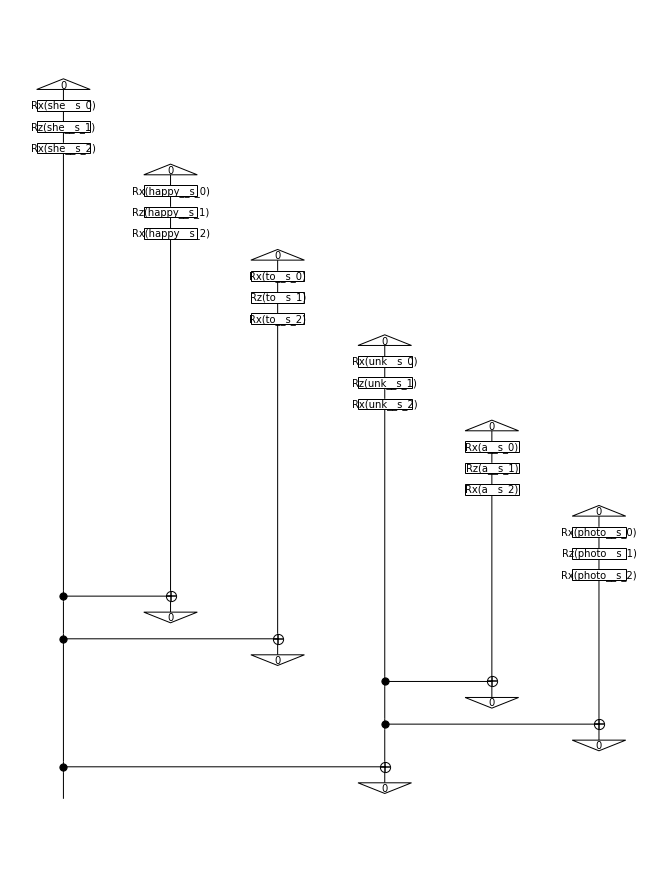

In [29]:
# sample circuit diagram
train_circuits[0].draw(figsize=(9, 12))
train_circuit_tk = train_circuits[0].to_tk()
render_circuit_jupyter(train_circuit_tk)

In [30]:
# all circuits
all_circuits = train_circuits + dev_circuits + test_circuits

In [31]:
# initializing the Aer backend only when using TketModel
backend = AerBackend()
# backend configs
backend_config = {
    'backend': backend,
    'compilation': backend.default_compilation_pass(2),
    'shots': 8192
}

In [32]:
# initializing the Numpy Quantum Model model (TKET simulates a NISQ system and can be time consuming, hence we will use Numpy)
# model = TketModel.from_diagrams(all_circuits, backend_config=backend_config)
model = NumpyModel.from_diagrams(all_circuits)

In [33]:
# defining loss and accuracy (binary cross entropy)
loss = lambda y_hat, y: -np.sum(y * np.log(y_hat + EPSILON)) / len(y)
acc = lambda y_hat, y: np.sum(np.round(y_hat) == y) / len(y) / 2

In [34]:
# initializing the trainer for the model
trainer = QuantumTrainer(
    model,
    loss_function=loss,
    epochs=EPOCHS,
    optimizer=SPSAOptimizer,  # Simultaneous Perturbation Stochastic Approximation optimizer
    optim_hyperparams={'a': 0.2, 'c': 0.06, 'A': 0.01 * EPOCHS},
    evaluate_functions={'acc': acc},
    evaluate_on_train=True,
    verbose='text',
    seed=SEED
)

In [35]:
# training dataset (Quantum batch optimization)
train_dataset = Dataset(train_circuits, train_labels, batch_size=BATCH_SIZE)
# validation dataset
val_dataset = Dataset(dev_circuits, dev_labels, shuffle=False)

In [36]:
# fitting the model (training on train and validation dataset)
trainer.fit(train_dataset, val_dataset, logging_step=12)

Epoch 1:    train/loss: 1.7392   valid/loss: 1.4349   train/acc: 0.5659   valid/acc: 0.6744
Epoch 12:   train/loss: 1.7576   valid/loss: 1.3061   train/acc: 0.5039   valid/acc: 0.5891
Epoch 24:   train/loss: 1.5954   valid/loss: 1.0779   train/acc: 0.4806   valid/acc: 0.6124
Epoch 36:   train/loss: 1.4999   valid/loss: 2.1263   train/acc: 0.5891   valid/acc: 0.4651
Epoch 48:   train/loss: 1.6226   valid/loss: 1.2665   train/acc: 0.5659   valid/acc: 0.5814
Epoch 60:   train/loss: 1.1354   valid/loss: 1.0648   train/acc: 0.6357   valid/acc: 0.5969
Epoch 72:   train/loss: 0.9776   valid/loss: 0.7507   train/acc: 0.5736   valid/acc: 0.7364
Epoch 84:   train/loss: 0.9175   valid/loss: 0.9491   train/acc: 0.6202   valid/acc: 0.6822
Epoch 96:   train/loss: 0.8289   valid/loss: 0.9622   train/acc: 0.7984   valid/acc: 0.6744
Epoch 108:  train/loss: 0.7059   valid/loss: 0.7402   train/acc: 0.7442   valid/acc: 0.6977
Epoch 120:  train/loss: 0.4152   valid/loss: 0.6050   train/acc: 0.8372   valid/

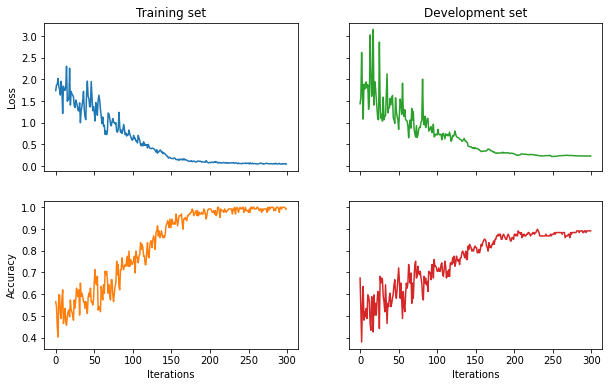

Test accuracy: 0.7846153846153846
Model summary
Train accuracy :  1.0
Validation accuracy :  0.8914728682170543
Test accuracy:  0.7846153846153846
Cummulative accuracy :  0.892029417610813


In [37]:
# plotting results
fig, ((ax_tl, ax_tr), (ax_bl, ax_br)) = plt.subplots(2, 2, sharex=True, sharey='row', figsize=(10, 6))
ax_tl.set_title('Training set')
ax_tr.set_title('Development set')
ax_bl.set_xlabel('Iterations')
ax_br.set_xlabel('Iterations')
ax_bl.set_ylabel('Accuracy')
ax_tl.set_ylabel('Loss')

colours = iter(plt.rcParams['axes.prop_cycle'].by_key()['color'])
ax_tl.plot(trainer.train_epoch_costs, color=next(colours))
ax_bl.plot(trainer.train_results['acc'], color=next(colours))
ax_tr.plot(trainer.val_costs, color=next(colours))
ax_br.plot(trainer.val_results['acc'], color=next(colours))
plt.show()

# Model accuracy on test dataset
test_acc = acc(model(test_circuits), test_labels)
train_acc = acc(model(train_circuits), train_labels)
dev_acc = acc(model(dev_circuits), dev_labels)
cumulative_acc = (train_acc + dev_acc + test_acc) / 3
print('Test accuracy:', test_acc)
print("Model summary")
print("Train accuracy : ", train_acc)
print("Validation accuracy : ", dev_acc)
print("Test accuracy: ", test_acc)
print("Cummulative accuracy : ", cumulative_acc)

In [98]:
import lambeq

# Function for replacing the unknown word(s) with <unk> token
def replace(box):
    if box.name not in known_words_list:
        return Word('unk', box.cod, box.dom)
    return box


# Function for printing the label based on the prediction array
def result_label(prediction):
    depressive_score = prediction[0][0]
    non_depressive_score = prediction[0][1]
    label = 0

    if depressive_score > non_depressive_score:
        label = 1
        return label
    elif depressive_score <= non_depressive_score:
        return label


"""
With this approach we can have both the similarity check of two sentences as well as their individual label, hence we 
won't have any loss of information since we trained the model to classify each label, not just which two labels are in
one category.
"""


def same_category(sentence1, sentence2):
    if result_label(sentence1) == result_label(sentence2) and result_label(sentence1) == 1:
        print("Both sentences are depressive")
        group = "Same Category Depressive"
        return group
    elif result_label(sentence1) == result_label(sentence2) and result_label(sentence1) == 0:
        print("Both sentences are non-depressive")
        group = "Same Category Non-depressive"
        return group
    elif result_label(sentence1) == 1 and result_label(sentence2) == 0:
        print("Sentence 1 is depressive and Sentence 2 is non-depressive")
        group = "Different Category"
        return group
    elif result_label(sentence1) == 0 and result_label(sentence2) == 1:
        print("Sentence 1 is non-depressive and Sentence 2 is depressive")
        group = "Different Category"
        return group

In [99]:
# Loading checkpoint model (300 epoch model)
model = NumpyModel.from_checkpoint('runs/Nov23_13-38-47_jupyter-62cd92e9ccef1cfbb44b4d25/model.lt')

In [100]:
print(model.symbols)

[I__s_0, I__s_1, I__s_2, a__s_0, a__s_1, a__s_2, about__s_0, about__s_1, about__s_2, again__s_0, again__s_1, again__s_2, agonies__s_0, agonies__s_1, agonies__s_2, all__s_0, all__s_1, all__s_2, alone__s_0, alone__s_1, alone__s_2, amazing__s_0, amazing__s_1, amazing__s_2, and__s_0, and__s_1, and__s_2, anger__s_0, anger__s_1, anger__s_2, angry__s_0, angry__s_1, angry__s_2, anxiety__s_0, anxiety__s_1, anxiety__s_2, appreciate__s_0, appreciate__s_1, appreciate__s_2, appreciates__s_0, appreciates__s_1, appreciates__s_2, are__s_0, are__s_1, are__s_2, area__s_0, area__s_1, area__s_2, as__s_0, as__s_1, as__s_2, ashamed__s_0, ashamed__s_1, ashamed__s_2, at__s_0, at__s_1, at__s_2, attempted__s_0, attempted__s_1, attempted__s_2, back__s_0, back__s_1, back__s_2, be__s_0, be__s_1, be__s_2, because__s_0, because__s_1, because__s_2, began__s_0, began__s_1, began__s_2, by__s_0, by__s_1, by__s_2, came__s_0, came__s_1, came__s_2, commit__s_0, commit__s_1, commit__s_2, commited__s_0, commited__s_1, commit

In [101]:
# test sentence
test_sentence = ['I am really sad max .', 'I am very happy']

In [102]:
# initializing spacy tokenizer
tokeniser = lambeq.SpacyTokeniser()

In [103]:
"""
tokenize for words with suffix (We can use either the SpaCy tokenizer or the fix_suffix method)
Note : using both suffix_tokenizer and fix_suffix_sentences essentially allows the model to perform better
"""
# suffix tokenizing for test sentence
test_sentence = suffix_tokenizer(test_sentence)
test_sentence = fix_suffix_sentences(test_sentence, spacy_token=True)

In [104]:
for i in range(len(test_sentence)):
    # rewriting testing sentences for parser on sentence level (Use when not using Rewriter Object)
    # (Can use remove_dots_commas in either case)
    test_sentence[i] = remove_dots_commas(test_sentence[i])
    test_sentence[i] = remove_connector(test_sentence[i])
    test_sentence[i] = remove_auxiliary(test_sentence[i])
    test_sentence[i] = remove_determiner(test_sentence[i])

In [105]:
# merging all diagrams into one
all_diagrams = train_diagrams + dev_diagrams + test_diagrams

# known symbols (330 words)
known_words = []
known_words_list = []
for i in range(len(all_diagrams)):
    known_words = [box.name for box in all_diagrams[i].boxes if isinstance(box, Word)]
    for j in range(len(known_words)):
        known_words_list.append(known_words[j])

print(known_words_list)

['he', 'overtaken', 'by', 'depression', 'he', 'dreaded', 'it', 'is', 'a', 'sad', 'and', 'depressing', 'world', 'I', 'sad', 'to', 'say', 'I', 'regretted', 'my', 'decision', 'he', 'crying', 'in', 'shower', 'rainy', 'days', 'always', 'depress', 'me', 'they', 'crying', 'in', 'their', 'room', 'they', 'crying', 'in', 'their', 'shower', 'he', 'crying', 'in', 'shower', 'alone', 'she', 'crying', 'alone', 'in', 'her', 'room', 'I', 'crying', 'because', 'I', 'sad', 'this', 'drug', 'helps', 'depressed', 'man', 'it', 'would', 'really', 'depress', 'me', 'if', 'I', 'did', 'depressed', 'person', 'was', 'very', 'sad', 'and', 'lonely', 'I', 'depressed', 'by', 'thought', 'of', 'her', 'crying', 'I', 'overwhelmed', 'by', 'feelings', 'of', 'depression', 'depression', 'is', 'caused', 'by', 'holding', 'in', 'anger', 'I', 'realised', 'I', 'becoming', 'increasingly', 'depressed', 'and', 'sad', 'thought', 'of', 'taking', 'exam', 'again', 'depressed', 'him', 'he', 'sad', 'and', 'confused', 'he', 'depressed', 'she'

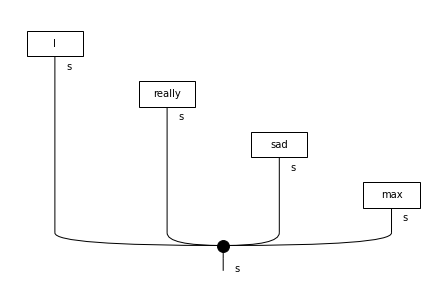

In [106]:
# new sample
new_diagram = parser.sentence2diagram(test_sentence[0])
new_diagram2 = parser.sentence2diagram(test_sentence[1])

new_diagram.draw()

In [107]:
# initializing the replace functor
replace_functor = Functor(ob=lambda x: x, ar=replace)

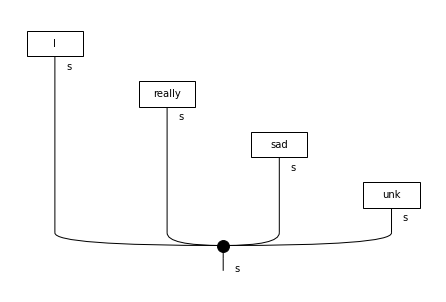

In [108]:
# tokenized diagram
replaced_diag = replace_functor(new_diagram)
replaced_diag.draw()
replaced_diag2 = replace_functor(new_diagram2)

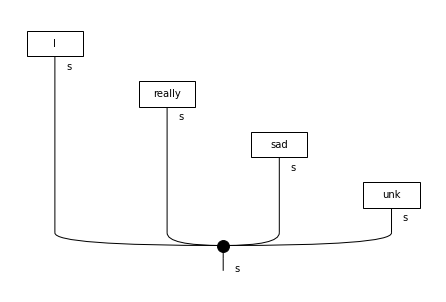

In [109]:
# removing cups
diagram = remove_cups(replaced_diag)
diagram.draw()
diagram2 = remove_cups(replaced_diag2)

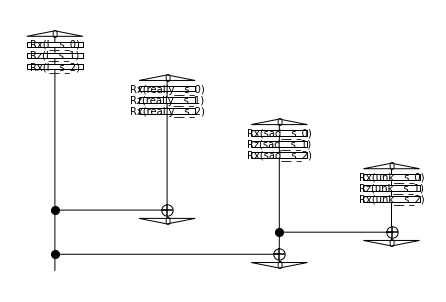

In [110]:
# initializing the ansatz for generating the circuit (1 layer, 3 qubits) (output : 1 qubit)
ansatz = IQPAnsatz({AtomicType.NOUN: 1, AtomicType.SENTENCE: 1, AtomicType.PREPOSITIONAL_PHRASE: 1}, n_layers=1,
                   n_single_qubit_params=3)

# converting the diagram to a circuit
diagram = ansatz(diagram)
diagram2 = ansatz(diagram2)
# Circuit show
diagram.draw()

In [111]:
# predicting on new input
prediction = model.forward([diagram])
prediction2 = model.forward([diagram2])
result = prediction.tolist()
result2 = prediction2.tolist()
print(result)
print(result2)
same_category(result, result2)

[[0.9979951311150215, 0.0020048688849784524]]
[[0.006660987876850992, 0.993339012123149]]
Sentence 1 is depressive and Sentence 2 is non-depressive


'Different Category'